In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras 

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

In [4]:
data = pd.read_csv('./data.csv')
seed = 5
np.random.seed(seed)

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id", axis=1, inplace=True)

In [17]:
data.columns.shape

(31,)

In [8]:
prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[prediction_var].values
Y = data.diagnosis.values

In [9]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [20]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
model = create_baseline()
history = model.fit(X, encoded_Y, validation_split = 0.2, epochs = 100)


Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 0s 926us/step - loss: 1.0610 - acc: 0.4088 - val_loss: 0.7262 - val_acc: 0.2281
Epoch 2/100
455/455 [==============================] - 0s 101us/step - loss: 0.7103 - acc: 0.5033 - val_loss: 0.7679 - val_acc: 0.2281
Epoch 3/100
455/455 [==============================] - 0s 98us/step - loss: 0.6281 - acc: 0.4484 - val_loss: 0.6286 - val_acc: 0.9211
Epoch 4/100
455/455 [==============================] - 0s 92us/step - loss: 0.6052 - acc: 0.7604 - val_loss: 0.6829 - val_acc: 0.3246
Epoch 5/100
455/455 [==============================] - 0s 75us/step - loss: 0.5598 - acc: 0.7297 - val_loss: 0.5561 - val_acc: 0.9035
Epoch 6/100
455/455 [==============================] - 0s 90us/step - loss: 0.5113 - acc: 0.8791 - val_loss: 0.5031 - val_acc: 0.9123
Epoch 7/100
455/455 [==============================] - 0s 101us/step - loss: 0.4784 - acc: 0.9011 - val_loss: 0.5052 - val_acc: 0.8596
Epoch 8/100
4

455/455 [==============================] - 0s 64us/step - loss: 0.1897 - acc: 0.9231 - val_loss: 0.2493 - val_acc: 0.9123
Epoch 62/100
455/455 [==============================] - 0s 63us/step - loss: 0.1836 - acc: 0.9253 - val_loss: 0.2142 - val_acc: 0.9211
Epoch 63/100
455/455 [==============================] - 0s 64us/step - loss: 0.1833 - acc: 0.9231 - val_loss: 0.2456 - val_acc: 0.9123
Epoch 64/100
455/455 [==============================] - 0s 78us/step - loss: 0.1913 - acc: 0.9231 - val_loss: 0.2460 - val_acc: 0.9123
Epoch 65/100
455/455 [==============================] - 0s 63us/step - loss: 0.1811 - acc: 0.9297 - val_loss: 0.1960 - val_acc: 0.9211
Epoch 66/100
455/455 [==============================] - 0s 73us/step - loss: 0.1811 - acc: 0.9275 - val_loss: 0.2107 - val_acc: 0.9211
Epoch 67/100
455/455 [==============================] - 0s 62us/step - loss: 0.1844 - acc: 0.9319 - val_loss: 0.2890 - val_acc: 0.8860
Epoch 68/100
455/455 [==============================] - 0s 59us/step

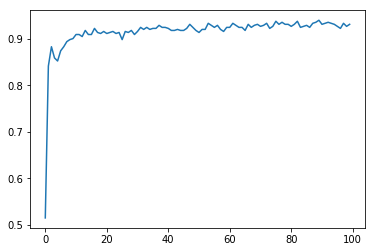

In [15]:
plt.plot(history.history['acc'])
plt.show()